<a href="https://colab.research.google.com/github/Godkimchiy/Long-and-short-of-it/blob/master/intern0205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  with InteractiveSession._count_lock:


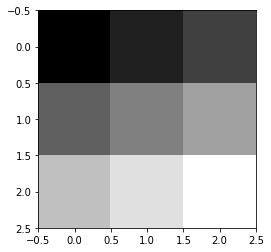

In [41]:
# Making matrix & visulization for sample input image 

sess = tf.InteractiveSession()
image = np.array([
    [[[1],[2],[3]],
     [[4],[5],[6]],
     [[7],[8],[9]]]], dtype=np.float32
)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys') # shape을 보면 알듯이 reshape안해주면 에러난다.

shape of Image :  (1, 3, 3, 1)
shape of weight :  (2, 2, 1, 1)
shape of conv2d_img :  (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


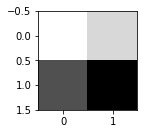

In [37]:
# 1 filter (2,2,1,1) with paddding: VALID
# weight.shape = 1filter(2,2,1,1) 2x2필터 
# output after filtering image with filter(conv2d)

print("shape of Image : ", image.shape)
weight = tf.constant([
                      [[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]         
                      ]) # filter의 weight를 임의의로 설정해준다.
print("shape of weight : ",weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("shape of conv2d_img : ",conv2d_img.shape) # image의 와 shape가 맞지 않다.
conv2d_img = np.swapaxes(conv2d_img, 0, 3) # 행렬의 두 축을 바꿔서 image와 shape를 맞춘다.

for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(2,2))
  plt.subplot(2,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='Greys')

일반적으로 입출력 사이즈를 같게하기 위해 padding = 'same' 조건을 두고 필터링을 거친다. 이번에는 conv2d layer(filter)를 거치면서 입출력의 사이즈도 동일하게 유지할 것이다

shape of image is  (1, 3, 3, 1)
shape of weight is  (2, 2, 1, 1)
shape of conv2d_img is  (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


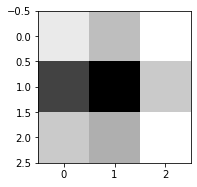

In [42]:
print("shape of image is ", image.shape)

weight = tf.constant([
                      [[[1.]],[[1.]]],
                       [[[1.]],[[1.]]]
])

print("shape of weight is ", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("shape of conv2d_img is ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0,3)

for i, one_img in enumerate(conv2d_img):
  print(one_img.reshape(3,3))
  plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='Greys')

출력된 것을 보면 왼쪽상단 2x2는 위에서 구한것과 같고, padding으로 사이즈에 맞게 추가된 부분은 밝은 것으로 보아 0값들로 채워졌다는 것을 다시 한 번 확인할 수 있다.

이제는 필터를 세 개를 사용해 볼 것이다. weight의 shape에서 값을 늘려주면 되는데 이는 color 사진의 경우를 다룰 때 활용된다. Input 이미지가 (3x3) x3(r,g,b 각각 하나씩) 이러한 배열로 구성되기 때문이다.

shape of image is  (1, 3, 3, 1)
shape of weight is  (2, 2, 1, 3)
shape of conv2d_img is  (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


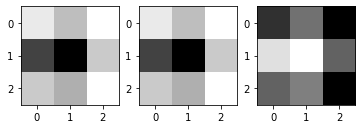

In [43]:
print("shape of image is ", image.shape)

weight = tf.constant([
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]
                      ])
print("shape of weight is ", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("shape of conv2d_img is ", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='Greys')

> **Subsampling Image Data - MaxPooling**

2x2 filter & stride 2


In [49]:
pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
print(pool.shape)
print(pool.eval())


(1, 2, 2, 1)
[[[[5.]
   [6.]]

  [[8.]
   [9.]]]]
